# 선형 회귀

## k-최근접 이웃의 한계

In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [2]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [3]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

* 50cm 농어의 무게를 1,033g으로 예측하였음 실제 무게는 더 많이 나간다고 하는데 어디서 문제가 생긴것일까?

In [4]:
print(knr.predict([[50]]))

[1033.33333333]


In [5]:
import matplotlib.pyplot as plt

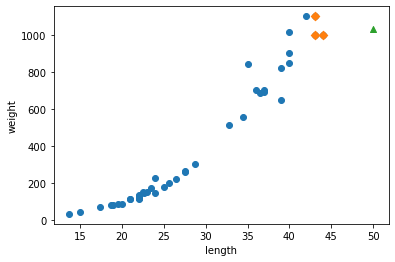

In [7]:
# 50cm 농어의 이웃을 구합니다
# kneighbors() 메서드를 사용하면 가장 가까운 이웃까지의 거리와 이웃샘플의 인덱스를 얻을 수 있다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(X_train, y_train)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(X_train[indexes], y_train[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [9]:
# 이웃 샘플들의 타깃의 평균 구하기
print(np.mean(y_train[indexes]))

1033.3333333333333


In [10]:
# 길이가 100cm인 농어의 무게도 1,033g으로 예측합니다
print(knr.predict([[100]]))

[1033.33333333]


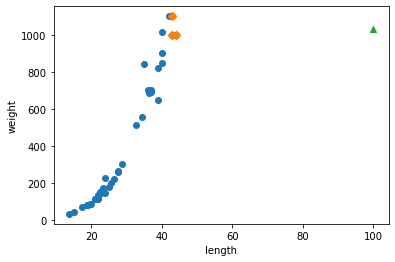

In [11]:
# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(X_train, y_train)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(X_train[indexes], y_train[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* K-최근접 이웃을 사용해 이 문제를 해결하려면 가장 큰 농어가 포함되도록 훈련세트를 다시 만들어야 합니다

## 선형 회귀

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


* coef_ 와 intercept_를 머신러닝이 찾은 값으므로 모델파라미터이다.  이것은 모델기반학습 이라고 한다.
* k-최근접이웃에는 모델파라미터가 없습니다 훈련세트를 저장하는 것이 훈련의 전부이고. 이것은 사례기반학습이라 한다.
* coef_는 계수(coefficient) 또는 가중치(weight) 라고 한다.

In [15]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


y = $ax$ + b
- y = $39 * 15$ - 709
- y = $39 * 50$ - 709

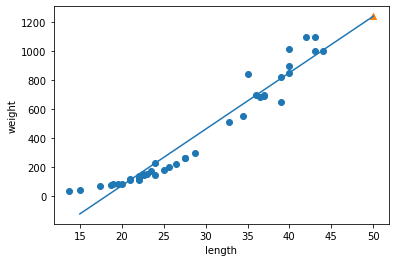

In [16]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(X_train, y_train)
# 15에서 50까지 1차 방정식 그래프를 그립니다
# (15, 15X39-709) 와 (50, 50X39-709)  두점을 이은 직선을 그린다.
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 훈련세트의 점수도 높지 않고 과소적합된 문제가 있음
* 선형회귀가 만든 직선이 왼쪽 아래로 쭉 뻗어 있는데, 농어의 무게가 0g 이하로 내려가 있다. 현실에서 있을 수 없는 일이다.

In [17]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9398463339976041
0.8247503123313559


## 다항 회귀
* 농어의 길이와 무게에 대한 산점도는 직선보다는 곡선에 가깝다
* 2차 방정식 그래프를 그리려면 길이를 제곱한 항이 훈련세트에 추가되어야 한다.
* numpy의 column_stack() 함수를 사용하여 X_train을 제곱한 값 배열과 X_train 값 배열을 나란히 붙이면 된다. 

In [19]:
train_poly = np.column_stack((X_train ** 2, X_train))
test_poly = np.column_stack((X_test ** 2, X_test))

In [21]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [24]:
train_poly[:5]

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ]])

In [25]:
test_poly[:5]

array([[ 70.56,   8.4 ],
       [324.  ,  18.  ],
       [756.25,  27.5 ],
       [453.69,  21.3 ],
       [506.25,  22.5 ]])

### 2차 방정식
$ax^2$ + $bx$ + c
* $x$는 변수, $a$와 $b$는 $x^2$, $x$의 계수라고 하며, $c$는 상수항이라고 부른다
-
* train_poly를 사용해 선형회귀모델을 다시 훈련한다 이 모델은 2차 방정식 a, b, c를 찾을 수 있어야 한다
* 2차 방정식 그래프를 찾기 위해 훈련세트에 제곱항을 추가했지만, 타깃값은 그대로 사용한다
* 테스트 할때 농어 길이의 제곱과 원래의 길이를 함께 넣어 주어야 한다.

In [26]:
lr = LinearRegression()
lr.fit(train_poly, y_train)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


* 무게 = 1.01 x 길이$^2$ - 21.6 x 길이 + 116.05
* 이런 방정식을 다항식이라고 부르며 다항식을 사용한 선형회귀를 다항회귀(polynomial regression)라고 한다.

In [27]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


* 2차 방정식의 계수와 절편을 알았으니 짧은 직선을 이어서 그리면 마치 곡선처럼 표현할 수 있다
* 단순 선형 회귀모델 보다 좀 더 나은 그래프가 그려짐

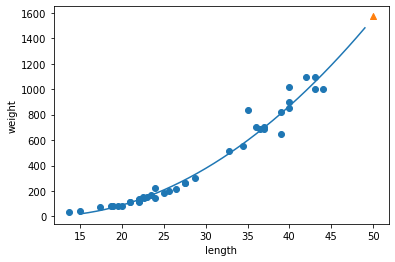

In [28]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그립니다
plt.scatter(X_train, y_train)
# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 훈련세트와 테스트 세트의 점수가 크게 높아짐 하지만 테스트 점수가 조금 더 높음

In [29]:
print(lr.score(train_poly, y_train))
print(lr.score(test_poly, y_test))

0.9706807451768623
0.9775935108325121
